In [1]:
dataset = 'REAIS'

In [2]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
import cv2
import seaborn as sns

In [3]:
train_dir = str('DATASET_YOLO_' + dataset)

model = YOLO("yolo12n-cls.yaml")

model.train(data=train_dir, epochs=300, imgsz=64, project='YOLO12-RESULTS', name=dataset)

YOLO12n-cls summary: 152 layers, 1,820,976 parameters, 1,820,976 gradients, 3.7 GFLOPs
New https://pypi.org/project/ultralytics/8.3.170 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.169 🚀 Python-3.11.0rc1 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=DATASET_YOLO_REAIS, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=64, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12n-cls.yaml, mom

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/conv.py:459: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.9±0.0 ms, read: 23.2±3.9 MB/s, size: 35.3 KB)


train: Scanning /tf/2025/DATASET_YOLO_REAIS/train... 3500 images, 0 corrupt: 100%|██████████| 3500/3500 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 1.6±0.2 ms, read: 16.0±3.0 MB/s, size: 45.4 KB)


val: Scanning /tf/2025/DATASET_YOLO_REAIS/val... 750 images, 0 corrupt: 100%|██████████| 750/750 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 58 weight(decay=0.0), 59 weight(decay=0.0005), 59 bias(decay=0.0)
Image sizes 64 train, 64 val
Using 8 dataloader workers
Logging results to YOLO12-RESULTS/REAIS
Starting training for 300 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/300     0.602G      2.314         12         64: 100%|██████████| 219/219 [00:05<00:00, 37.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 61.52it/s]

                   all     0.0867      0.505



      Epoch    GPU_mem       loss  Instances       Size


      2/300     0.602G      2.353         12         64: 100%|██████████| 219/219 [00:05<00:00, 42.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.54it/s] 

                   all      0.117      0.613



      Epoch    GPU_mem       loss  Instances       Size


      3/300     0.602G        2.4         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.88it/s] 

                   all      0.104        0.5



      Epoch    GPU_mem       loss  Instances       Size


      4/300     0.602G      2.336         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.67it/s] 

                   all      0.149      0.639



      Epoch    GPU_mem       loss  Instances       Size


      5/300     0.602G      2.272         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.38it/s] 

                   all      0.173      0.727

      Epoch    GPU_mem       loss  Instances       Size



      6/300     0.602G      2.223         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.32it/s] 

                   all      0.171      0.653



      Epoch    GPU_mem       loss  Instances       Size


      7/300     0.602G      2.198         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.08it/s] 

                   all      0.147      0.655



      Epoch    GPU_mem       loss  Instances       Size


      8/300     0.602G      2.157         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.75it/s] 

                   all       0.22      0.755



      Epoch    GPU_mem       loss  Instances       Size


      9/300     0.602G      2.099         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.93it/s] 

                   all      0.236      0.789



      Epoch    GPU_mem       loss  Instances       Size


     10/300     0.602G      2.108         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.78it/s] 

                   all      0.224      0.723

      Epoch    GPU_mem       loss  Instances       Size



     11/300     0.602G      2.093         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.32it/s] 

                   all      0.201      0.763



      Epoch    GPU_mem       loss  Instances       Size


     12/300     0.602G      2.051         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.16it/s] 

                   all      0.277      0.801

      Epoch    GPU_mem       loss  Instances       Size



     13/300     0.602G      2.042         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.14it/s] 

                   all       0.22      0.779

      Epoch    GPU_mem       loss  Instances       Size



     14/300     0.602G      2.033         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.07it/s] 

                   all      0.275       0.82



      Epoch    GPU_mem       loss  Instances       Size


     15/300     0.602G      1.997         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.77it/s] 

                   all      0.276      0.807



      Epoch    GPU_mem       loss  Instances       Size


     16/300     0.602G      1.987         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.22it/s] 

                   all      0.268      0.817



      Epoch    GPU_mem       loss  Instances       Size


     17/300     0.602G      1.969         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.60it/s] 

                   all      0.291      0.816



      Epoch    GPU_mem       loss  Instances       Size


     18/300     0.602G      1.985         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.42it/s] 

                   all      0.315      0.821



      Epoch    GPU_mem       loss  Instances       Size


     19/300     0.602G      1.969         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 82.03it/s] 

                   all      0.297      0.831



      Epoch    GPU_mem       loss  Instances       Size


     20/300     0.602G      1.945         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.01it/s] 

                   all      0.279      0.811



      Epoch    GPU_mem       loss  Instances       Size


     21/300     0.602G      1.929         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.84it/s] 

                   all      0.291       0.84



      Epoch    GPU_mem       loss  Instances       Size


     22/300     0.602G      1.938         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.40it/s] 

                   all      0.192      0.637

      Epoch    GPU_mem       loss  Instances       Size



     23/300     0.602G      1.946         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.54it/s] 

                   all      0.305      0.825



      Epoch    GPU_mem       loss  Instances       Size


     24/300     0.602G      1.932         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.77it/s] 

                   all      0.327      0.859

      Epoch    GPU_mem       loss  Instances       Size



     25/300     0.602G      1.929         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.28it/s] 

                   all      0.297      0.828



      Epoch    GPU_mem       loss  Instances       Size


     26/300     0.602G      1.899         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.12it/s] 

                   all      0.359      0.867



      Epoch    GPU_mem       loss  Instances       Size


     27/300     0.602G        1.9         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.31it/s] 

                   all      0.359      0.859

      Epoch    GPU_mem       loss  Instances       Size



     28/300     0.602G      1.893         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.13it/s] 

                   all      0.373      0.877



      Epoch    GPU_mem       loss  Instances       Size


     29/300     0.602G      1.864         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.23it/s] 

                   all       0.32      0.895



      Epoch    GPU_mem       loss  Instances       Size


     30/300     0.602G      1.883         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.09it/s] 

                   all      0.369      0.899



      Epoch    GPU_mem       loss  Instances       Size


     31/300     0.602G      1.843         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.57it/s] 

                   all      0.377      0.879



      Epoch    GPU_mem       loss  Instances       Size


     32/300     0.602G      1.815         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.72it/s] 

                   all      0.385      0.881



      Epoch    GPU_mem       loss  Instances       Size


     33/300     0.602G      1.809         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.63it/s] 

                   all      0.401      0.901



      Epoch    GPU_mem       loss  Instances       Size


     34/300     0.602G      1.768         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.87it/s] 


                   all      0.409      0.901

      Epoch    GPU_mem       loss  Instances       Size


     35/300     0.602G      1.759         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.95it/s] 

                   all      0.437      0.921

      Epoch    GPU_mem       loss  Instances       Size



     36/300     0.602G      1.744         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.94it/s] 

                   all      0.417      0.919

      Epoch    GPU_mem       loss  Instances       Size



     37/300     0.602G      1.743         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.22it/s] 

                   all      0.451      0.924

      Epoch    GPU_mem       loss  Instances       Size



     38/300     0.602G       1.73         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.85it/s] 

                   all      0.469      0.917

      Epoch    GPU_mem       loss  Instances       Size



     39/300     0.602G      1.706         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.72it/s] 

                   all      0.452      0.921



      Epoch    GPU_mem       loss  Instances       Size


     40/300     0.602G      1.694         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.84it/s] 

                   all      0.452      0.925



      Epoch    GPU_mem       loss  Instances       Size


     41/300     0.602G      1.692         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.41it/s] 

                   all      0.469      0.928



      Epoch    GPU_mem       loss  Instances       Size


     42/300     0.602G      1.667         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.22it/s] 

                   all      0.491      0.923

      Epoch    GPU_mem       loss  Instances       Size



     43/300     0.602G      1.665         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.70it/s] 

                   all      0.455      0.935



      Epoch    GPU_mem       loss  Instances       Size


     44/300     0.602G      1.667         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.23it/s] 

                   all       0.48      0.945



      Epoch    GPU_mem       loss  Instances       Size


     45/300     0.602G      1.643         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.64it/s] 

                   all      0.516      0.941



      Epoch    GPU_mem       loss  Instances       Size


     46/300     0.602G      1.648         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.57it/s] 

                   all        0.5      0.929

      Epoch    GPU_mem       loss  Instances       Size



     47/300     0.602G      1.623         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.47it/s] 

                   all      0.516      0.932

      Epoch    GPU_mem       loss  Instances       Size



     48/300     0.602G       1.62         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.47it/s] 

                   all      0.483      0.912

      Epoch    GPU_mem       loss  Instances       Size



     49/300     0.602G      1.617         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.51it/s] 

                   all      0.535      0.941



      Epoch    GPU_mem       loss  Instances       Size


     50/300     0.602G      1.577         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.05it/s] 

                   all      0.517      0.944



      Epoch    GPU_mem       loss  Instances       Size


     51/300     0.602G      1.582         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.20it/s] 

                   all      0.503      0.953



      Epoch    GPU_mem       loss  Instances       Size


     52/300     0.602G       1.57         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.50it/s] 

                   all      0.533      0.955



      Epoch    GPU_mem       loss  Instances       Size


     53/300     0.602G      1.548         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.61it/s] 

                   all      0.541      0.941



      Epoch    GPU_mem       loss  Instances       Size


     54/300     0.602G      1.545         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.16it/s] 

                   all      0.547      0.951

      Epoch    GPU_mem       loss  Instances       Size



     55/300     0.602G      1.561         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.52it/s] 

                   all       0.56      0.956

      Epoch    GPU_mem       loss  Instances       Size



     56/300     0.602G      1.537         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.06it/s] 

                   all      0.563      0.949



      Epoch    GPU_mem       loss  Instances       Size


     57/300     0.602G      1.548         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.19it/s] 

                   all      0.552      0.951

      Epoch    GPU_mem       loss  Instances       Size



     58/300     0.602G      1.507         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.47it/s] 

                   all      0.536      0.932

      Epoch    GPU_mem       loss  Instances       Size



     59/300     0.602G      1.511         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.50it/s] 

                   all      0.533      0.939

      Epoch    GPU_mem       loss  Instances       Size



     60/300     0.602G      1.504         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.56it/s] 

                   all      0.576      0.945



      Epoch    GPU_mem       loss  Instances       Size


     61/300     0.602G      1.489         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.71it/s] 

                   all      0.575      0.945

      Epoch    GPU_mem       loss  Instances       Size



     62/300     0.602G      1.472         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.70it/s] 

                   all      0.573      0.951

      Epoch    GPU_mem       loss  Instances       Size



     63/300     0.602G      1.473         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.02it/s] 

                   all      0.589       0.96

      Epoch    GPU_mem       loss  Instances       Size



     64/300     0.602G      1.457         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.44it/s] 

                   all      0.556      0.959



      Epoch    GPU_mem       loss  Instances       Size


     65/300     0.602G      1.438         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.27it/s] 

                   all      0.583      0.951



      Epoch    GPU_mem       loss  Instances       Size


     66/300     0.602G      1.446         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.45it/s] 

                   all      0.576      0.955



      Epoch    GPU_mem       loss  Instances       Size


     67/300     0.602G      1.437         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.13it/s] 

                   all      0.597      0.969



      Epoch    GPU_mem       loss  Instances       Size


     68/300     0.602G       1.43         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.90it/s] 

                   all      0.601      0.965



      Epoch    GPU_mem       loss  Instances       Size


     69/300     0.602G      1.405         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.43it/s] 

                   all      0.591      0.957

      Epoch    GPU_mem       loss  Instances       Size



     70/300     0.602G      1.399         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.82it/s] 

                   all      0.543      0.952

      Epoch    GPU_mem       loss  Instances       Size



     71/300     0.602G      1.396         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.29it/s] 

                   all      0.591      0.953



      Epoch    GPU_mem       loss  Instances       Size


     72/300     0.602G      1.387         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.83it/s] 

                   all      0.613      0.953



      Epoch    GPU_mem       loss  Instances       Size


     73/300     0.602G      1.416         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.21it/s] 

                   all      0.601      0.957



      Epoch    GPU_mem       loss  Instances       Size


     74/300     0.602G      1.383         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.40it/s] 

                   all      0.589      0.957



      Epoch    GPU_mem       loss  Instances       Size


     75/300     0.602G      1.396         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.65it/s] 

                   all      0.607       0.96

      Epoch    GPU_mem       loss  Instances       Size



     76/300     0.602G      1.387         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.66it/s] 

                   all      0.605      0.961



      Epoch    GPU_mem       loss  Instances       Size


     77/300     0.602G      1.368         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.76it/s] 

                   all      0.616      0.961

      Epoch    GPU_mem       loss  Instances       Size



     78/300     0.602G      1.366         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.48it/s] 

                   all      0.615      0.968

      Epoch    GPU_mem       loss  Instances       Size



     79/300     0.602G      1.352         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.74it/s] 

                   all      0.603      0.963

      Epoch    GPU_mem       loss  Instances       Size



     80/300     0.602G       1.31         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.42it/s] 

                   all      0.604      0.963

      Epoch    GPU_mem       loss  Instances       Size



     81/300     0.602G      1.348         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.33it/s] 

                   all       0.64      0.964



      Epoch    GPU_mem       loss  Instances       Size


     82/300     0.602G      1.349         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.75it/s] 

                   all      0.627      0.968



      Epoch    GPU_mem       loss  Instances       Size


     83/300     0.602G      1.358         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.16it/s] 

                   all      0.619      0.969



      Epoch    GPU_mem       loss  Instances       Size


     84/300     0.602G      1.346         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.03it/s] 

                   all      0.633       0.98



      Epoch    GPU_mem       loss  Instances       Size


     85/300     0.602G      1.312         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.41it/s] 

                   all      0.628      0.969

      Epoch    GPU_mem       loss  Instances       Size



     86/300     0.602G      1.312         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.28it/s] 

                   all      0.629      0.967



      Epoch    GPU_mem       loss  Instances       Size


     87/300     0.602G      1.328         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.41it/s] 

                   all      0.627      0.973



      Epoch    GPU_mem       loss  Instances       Size


     88/300     0.602G      1.334         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.06it/s] 

                   all      0.643      0.972



      Epoch    GPU_mem       loss  Instances       Size


     89/300     0.602G      1.281         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.10it/s] 

                   all      0.641      0.972



      Epoch    GPU_mem       loss  Instances       Size


     90/300     0.602G      1.305         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.37it/s] 

                   all      0.647      0.968



      Epoch    GPU_mem       loss  Instances       Size


     91/300     0.602G      1.307         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.51it/s] 

                   all      0.648      0.968

      Epoch    GPU_mem       loss  Instances       Size



     92/300     0.602G       1.27         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.05it/s] 

                   all      0.633      0.964

      Epoch    GPU_mem       loss  Instances       Size



     93/300     0.602G      1.277         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.47it/s] 

                   all       0.64      0.973



      Epoch    GPU_mem       loss  Instances       Size


     94/300     0.602G      1.251         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.93it/s] 

                   all      0.644      0.967



      Epoch    GPU_mem       loss  Instances       Size


     95/300     0.602G      1.295         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.20it/s] 

                   all      0.656      0.971



      Epoch    GPU_mem       loss  Instances       Size


     96/300     0.602G      1.271         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.58it/s] 

                   all      0.672      0.973

      Epoch    GPU_mem       loss  Instances       Size



     97/300     0.602G      1.263         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.29it/s] 

                   all      0.631      0.967



      Epoch    GPU_mem       loss  Instances       Size


     98/300     0.602G      1.285         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.29it/s] 

                   all      0.645      0.972

      Epoch    GPU_mem       loss  Instances       Size



     99/300     0.602G       1.26         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.96it/s] 

                   all      0.657      0.977



      Epoch    GPU_mem       loss  Instances       Size


    100/300     0.602G      1.247         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.49it/s] 

                   all      0.647      0.969

      Epoch    GPU_mem       loss  Instances       Size



    101/300     0.602G      1.259         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.85it/s] 

                   all      0.649      0.971



      Epoch    GPU_mem       loss  Instances       Size


    102/300     0.602G      1.301         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.09it/s] 

                   all      0.635      0.968



      Epoch    GPU_mem       loss  Instances       Size


    103/300     0.602G      1.248         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.93it/s] 


                   all      0.669      0.973

      Epoch    GPU_mem       loss  Instances       Size


    104/300     0.602G      1.246         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.23it/s] 

                   all       0.66      0.976

      Epoch    GPU_mem       loss  Instances       Size



    105/300     0.602G      1.228         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.31it/s] 

                   all      0.679      0.976



      Epoch    GPU_mem       loss  Instances       Size


    106/300     0.602G       1.23         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.86it/s] 

                   all      0.668      0.973

      Epoch    GPU_mem       loss  Instances       Size



    107/300     0.602G       1.21         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.36it/s] 

                   all      0.659      0.971

      Epoch    GPU_mem       loss  Instances       Size



    108/300     0.602G       1.19         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.10it/s] 

                   all      0.679      0.965



      Epoch    GPU_mem       loss  Instances       Size


    109/300     0.602G      1.173         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.56it/s] 

                   all      0.667      0.975



      Epoch    GPU_mem       loss  Instances       Size


    110/300     0.602G       1.21         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.78it/s] 

                   all      0.692      0.971



      Epoch    GPU_mem       loss  Instances       Size


    111/300     0.602G      1.195         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.71it/s] 

                   all      0.663      0.973

      Epoch    GPU_mem       loss  Instances       Size



    112/300     0.602G      1.167         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.53it/s] 

                   all      0.681      0.972

      Epoch    GPU_mem       loss  Instances       Size



    113/300     0.602G      1.179         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.56it/s] 

                   all      0.691      0.972



      Epoch    GPU_mem       loss  Instances       Size


    114/300     0.602G       1.18         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.84it/s] 

                   all      0.693       0.98



      Epoch    GPU_mem       loss  Instances       Size


    115/300     0.602G      1.162         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.38it/s] 

                   all      0.685      0.969



      Epoch    GPU_mem       loss  Instances       Size


    116/300     0.602G      1.173         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.31it/s] 

                   all      0.677      0.972



      Epoch    GPU_mem       loss  Instances       Size


    117/300     0.602G      1.167         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.57it/s] 

                   all      0.696      0.977

      Epoch    GPU_mem       loss  Instances       Size



    118/300     0.602G      1.174         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.77it/s] 

                   all      0.679      0.975



      Epoch    GPU_mem       loss  Instances       Size


    119/300     0.602G      1.165         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.63it/s] 

                   all      0.679      0.975

      Epoch    GPU_mem       loss  Instances       Size



    120/300     0.602G      1.128         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.36it/s] 

                   all      0.687      0.971



      Epoch    GPU_mem       loss  Instances       Size


    121/300     0.602G      1.138         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.10it/s] 

                   all      0.687      0.977

      Epoch    GPU_mem       loss  Instances       Size



    122/300     0.602G      1.114         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.22it/s] 

                   all      0.691      0.975



      Epoch    GPU_mem       loss  Instances       Size


    123/300     0.602G      1.122         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.98it/s] 

                   all      0.704      0.977

      Epoch    GPU_mem       loss  Instances       Size



    124/300     0.602G      1.106         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.37it/s] 

                   all      0.713      0.983



      Epoch    GPU_mem       loss  Instances       Size


    125/300     0.602G      1.124         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.64it/s] 

                   all        0.7      0.976

      Epoch    GPU_mem       loss  Instances       Size



    126/300     0.602G       1.12         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.84it/s] 

                   all      0.711      0.977



      Epoch    GPU_mem       loss  Instances       Size


    127/300     0.602G      1.138         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.68it/s] 

                   all      0.699      0.975

      Epoch    GPU_mem       loss  Instances       Size



    128/300     0.602G      1.152         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.86it/s] 

                   all      0.709      0.976



      Epoch    GPU_mem       loss  Instances       Size


    129/300     0.602G      1.084         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.41it/s] 

                   all      0.713      0.972

      Epoch    GPU_mem       loss  Instances       Size



    130/300     0.602G      1.076         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.36it/s] 

                   all      0.709      0.976



      Epoch    GPU_mem       loss  Instances       Size


    131/300     0.602G      1.128         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.09it/s] 

                   all      0.703      0.976



      Epoch    GPU_mem       loss  Instances       Size


    132/300     0.602G       1.12         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.78it/s] 

                   all      0.691      0.983

      Epoch    GPU_mem       loss  Instances       Size



    133/300     0.602G      1.099         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.94it/s] 


                   all      0.692       0.98

      Epoch    GPU_mem       loss  Instances       Size


    134/300     0.602G      1.109         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.07it/s] 

                   all      0.691      0.977

      Epoch    GPU_mem       loss  Instances       Size



    135/300     0.602G      1.107         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.99it/s] 

                   all      0.695      0.979

      Epoch    GPU_mem       loss  Instances       Size



    136/300     0.602G       1.08         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.32it/s] 

                   all      0.697      0.979



      Epoch    GPU_mem       loss  Instances       Size


    137/300     0.602G      1.118         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.28it/s] 

                   all      0.704      0.977



      Epoch    GPU_mem       loss  Instances       Size


    138/300     0.602G      1.096         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.91it/s] 

                   all      0.713      0.981



      Epoch    GPU_mem       loss  Instances       Size


    139/300     0.602G      1.076         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.65it/s] 

                   all      0.707      0.979

      Epoch    GPU_mem       loss  Instances       Size



    140/300     0.602G      1.077         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.39it/s] 

                   all      0.715      0.976



      Epoch    GPU_mem       loss  Instances       Size


    141/300     0.602G      1.083         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.58it/s] 

                   all      0.715      0.973

      Epoch    GPU_mem       loss  Instances       Size



    142/300     0.602G       1.08         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.99it/s] 

                   all      0.716      0.975



      Epoch    GPU_mem       loss  Instances       Size


    143/300     0.602G       1.06         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.32it/s] 

                   all      0.717      0.976



      Epoch    GPU_mem       loss  Instances       Size


    144/300     0.602G      1.081         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.93it/s] 

                   all      0.716      0.979

      Epoch    GPU_mem       loss  Instances       Size



    145/300     0.602G      1.062         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.43it/s] 

                   all      0.701      0.977



      Epoch    GPU_mem       loss  Instances       Size


    146/300     0.602G      1.056         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.15it/s] 

                   all      0.704      0.975

      Epoch    GPU_mem       loss  Instances       Size



    147/300     0.602G      1.037         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.03it/s] 

                   all        0.7       0.98

      Epoch    GPU_mem       loss  Instances       Size



    148/300     0.602G      1.082         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.32it/s] 


                   all      0.708      0.979

      Epoch    GPU_mem       loss  Instances       Size


    149/300     0.602G      1.044         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.13it/s] 

                   all      0.705      0.979



      Epoch    GPU_mem       loss  Instances       Size


    150/300     0.602G      1.027         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.38it/s] 

                   all      0.707      0.976

      Epoch    GPU_mem       loss  Instances       Size



    151/300     0.602G      1.041         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.00it/s] 

                   all      0.715      0.976

      Epoch    GPU_mem       loss  Instances       Size



    152/300     0.602G       1.05         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.30it/s] 

                   all      0.713      0.979

      Epoch    GPU_mem       loss  Instances       Size



    153/300     0.602G      1.037         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.65it/s] 

                   all      0.716       0.98



      Epoch    GPU_mem       loss  Instances       Size


    154/300     0.602G      1.012         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.56it/s] 


                   all      0.715      0.981

      Epoch    GPU_mem       loss  Instances       Size


    155/300     0.602G      1.037         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.69it/s] 

                   all      0.721      0.981



      Epoch    GPU_mem       loss  Instances       Size


    156/300     0.602G      1.029         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.25it/s] 

                   all      0.729       0.98

      Epoch    GPU_mem       loss  Instances       Size



    157/300     0.602G      1.004         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.48it/s] 

                   all      0.721      0.979



      Epoch    GPU_mem       loss  Instances       Size


    158/300     0.602G      1.004         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.21it/s] 

                   all      0.725      0.984

      Epoch    GPU_mem       loss  Instances       Size



    159/300     0.602G     0.9861         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.06it/s] 

                   all      0.736       0.98



      Epoch    GPU_mem       loss  Instances       Size


    160/300     0.602G      1.014         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.08it/s] 

                   all      0.728      0.981



      Epoch    GPU_mem       loss  Instances       Size


    161/300     0.602G      1.002         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.49it/s] 

                   all      0.728      0.977



      Epoch    GPU_mem       loss  Instances       Size


    162/300     0.602G      0.991         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.90it/s] 


                   all      0.731      0.977

      Epoch    GPU_mem       loss  Instances       Size


    163/300     0.602G      1.003         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.04it/s] 


                   all      0.728      0.975

      Epoch    GPU_mem       loss  Instances       Size


    164/300     0.602G     0.9747         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.59it/s] 


                   all      0.736      0.983

      Epoch    GPU_mem       loss  Instances       Size


    165/300     0.602G      1.007         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.29it/s] 

                   all      0.735      0.983



      Epoch    GPU_mem       loss  Instances       Size


    166/300     0.602G      0.989         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.12it/s] 

                   all      0.731      0.979



      Epoch    GPU_mem       loss  Instances       Size


    167/300     0.602G     0.9697         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.49it/s] 

                   all      0.733      0.983



      Epoch    GPU_mem       loss  Instances       Size


    168/300     0.602G     0.9545         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.25it/s] 

                   all      0.735      0.979



      Epoch    GPU_mem       loss  Instances       Size


    169/300     0.602G      1.008         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.47it/s] 

                   all      0.727       0.98

      Epoch    GPU_mem       loss  Instances       Size



    170/300     0.602G     0.9718         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.51it/s] 

                   all      0.732       0.98

      Epoch    GPU_mem       loss  Instances       Size



    171/300     0.602G     0.9832         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.27it/s] 

                   all      0.733       0.98



      Epoch    GPU_mem       loss  Instances       Size


    172/300     0.602G     0.9699         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.79it/s] 


                   all      0.736      0.977

      Epoch    GPU_mem       loss  Instances       Size


    173/300     0.602G     0.9739         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.29it/s] 

                   all      0.739      0.977



      Epoch    GPU_mem       loss  Instances       Size


    174/300     0.602G     0.9794         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.13it/s] 

                   all      0.739       0.98

      Epoch    GPU_mem       loss  Instances       Size



    175/300     0.602G     0.9242         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.35it/s] 

                   all      0.733      0.979

      Epoch    GPU_mem       loss  Instances       Size



    176/300     0.602G     0.9801         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.23it/s] 

                   all      0.735       0.98

      Epoch    GPU_mem       loss  Instances       Size



    177/300     0.602G     0.9708         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.03it/s] 

                   all      0.744      0.977



      Epoch    GPU_mem       loss  Instances       Size


    178/300     0.602G     0.9594         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.06it/s] 

                   all       0.74      0.981



      Epoch    GPU_mem       loss  Instances       Size


    179/300     0.602G     0.9373         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.95it/s] 

                   all      0.741      0.983



      Epoch    GPU_mem       loss  Instances       Size


    180/300     0.602G     0.9381         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.59it/s] 

                   all      0.733      0.981

      Epoch    GPU_mem       loss  Instances       Size



    181/300     0.602G     0.9433         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.58it/s] 

                   all      0.728      0.979



      Epoch    GPU_mem       loss  Instances       Size


    182/300     0.602G     0.9503         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.70it/s] 

                   all      0.733      0.979

      Epoch    GPU_mem       loss  Instances       Size



    183/300     0.602G     0.9281         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.92it/s] 

                   all      0.741      0.979



      Epoch    GPU_mem       loss  Instances       Size


    184/300     0.602G     0.9398         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.29it/s] 

                   all      0.741      0.981

      Epoch    GPU_mem       loss  Instances       Size



    185/300     0.602G     0.9388         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.13it/s] 

                   all      0.736      0.984



      Epoch    GPU_mem       loss  Instances       Size


    186/300     0.602G     0.9275         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.07it/s] 

                   all       0.74      0.983

      Epoch    GPU_mem       loss  Instances       Size



    187/300     0.602G     0.9195         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.84it/s] 

                   all      0.739      0.981



      Epoch    GPU_mem       loss  Instances       Size


    188/300     0.602G     0.9281         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.62it/s] 

                   all       0.74      0.979

      Epoch    GPU_mem       loss  Instances       Size



    189/300     0.602G     0.9149         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.30it/s] 

                   all      0.744      0.981



      Epoch    GPU_mem       loss  Instances       Size


    190/300     0.602G     0.9183         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.10it/s] 

                   all       0.74      0.984

      Epoch    GPU_mem       loss  Instances       Size



    191/300     0.602G     0.9193         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.66it/s] 

                   all       0.74      0.981



      Epoch    GPU_mem       loss  Instances       Size


    192/300     0.602G      0.917         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.73it/s] 

                   all      0.743      0.984



      Epoch    GPU_mem       loss  Instances       Size


    193/300     0.602G     0.9161         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.78it/s] 

                   all      0.739      0.984



      Epoch    GPU_mem       loss  Instances       Size


    194/300     0.602G     0.8949         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.71it/s] 


                   all      0.735      0.987

      Epoch    GPU_mem       loss  Instances       Size


    195/300     0.602G     0.8746         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.14it/s] 

                   all       0.74      0.984

      Epoch    GPU_mem       loss  Instances       Size



    196/300     0.602G     0.9266         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.69it/s] 

                   all      0.745      0.987



      Epoch    GPU_mem       loss  Instances       Size


    197/300     0.602G       0.89         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.70it/s] 

                   all      0.741      0.985



      Epoch    GPU_mem       loss  Instances       Size


    198/300     0.602G     0.9062         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.74it/s] 

                   all      0.744      0.984

      Epoch    GPU_mem       loss  Instances       Size



    199/300     0.602G     0.9012         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.04it/s] 

                   all      0.741      0.983



      Epoch    GPU_mem       loss  Instances       Size


    200/300     0.602G      0.877         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.73it/s] 

                   all      0.744      0.981

      Epoch    GPU_mem       loss  Instances       Size



    201/300     0.602G     0.8932         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.71it/s] 

                   all      0.748       0.98



      Epoch    GPU_mem       loss  Instances       Size


    202/300     0.602G     0.8787         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.21it/s] 

                   all      0.747       0.98



      Epoch    GPU_mem       loss  Instances       Size


    203/300     0.602G     0.8886         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.84it/s] 

                   all      0.748      0.979

      Epoch    GPU_mem       loss  Instances       Size



    204/300     0.602G     0.8772         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.18it/s] 

                   all      0.749      0.981



      Epoch    GPU_mem       loss  Instances       Size


    205/300     0.602G      0.868         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.10it/s] 

                   all      0.747       0.98



      Epoch    GPU_mem       loss  Instances       Size


    206/300     0.602G      0.873         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.67it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.06it/s] 

                   all      0.751      0.979

      Epoch    GPU_mem       loss  Instances       Size



    207/300     0.602G     0.9198         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.57it/s] 

                   all      0.749      0.981



      Epoch    GPU_mem       loss  Instances       Size


    208/300     0.602G     0.8794         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.80it/s] 

                   all      0.752      0.979



      Epoch    GPU_mem       loss  Instances       Size


    209/300     0.602G     0.8608         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.55it/s] 

                   all      0.751       0.98



      Epoch    GPU_mem       loss  Instances       Size


    210/300     0.602G     0.8595         12         64: 100%|██████████| 219/219 [00:04<00:00, 45.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.42it/s] 

                   all      0.751       0.98



      Epoch    GPU_mem       loss  Instances       Size


    211/300     0.602G      0.855         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.60it/s] 

                   all      0.747      0.981



      Epoch    GPU_mem       loss  Instances       Size


    212/300     0.602G     0.8532         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.50it/s] 

                   all      0.749      0.983

      Epoch    GPU_mem       loss  Instances       Size



    213/300     0.602G     0.8758         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.99it/s] 

                   all      0.751      0.983

      Epoch    GPU_mem       loss  Instances       Size



    214/300     0.602G     0.8576         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.47it/s] 


                   all      0.753      0.984

      Epoch    GPU_mem       loss  Instances       Size


    215/300     0.602G     0.8397         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.82it/s] 

                   all      0.749      0.984



      Epoch    GPU_mem       loss  Instances       Size


    216/300     0.602G     0.8569         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.10it/s] 

                   all      0.745      0.983



      Epoch    GPU_mem       loss  Instances       Size


    217/300     0.602G     0.8561         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.93it/s] 

                   all      0.743      0.983



      Epoch    GPU_mem       loss  Instances       Size


    218/300     0.602G     0.8456         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.09it/s] 

                   all      0.745      0.983



      Epoch    GPU_mem       loss  Instances       Size


    219/300     0.602G     0.8494         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.20it/s] 

                   all      0.748      0.983

      Epoch    GPU_mem       loss  Instances       Size



    220/300     0.602G     0.8249         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.25it/s] 

                   all      0.749      0.983

      Epoch    GPU_mem       loss  Instances       Size



    221/300     0.602G     0.8448         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.84it/s] 

                   all      0.752      0.983



      Epoch    GPU_mem       loss  Instances       Size


    222/300     0.602G     0.8249         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.41it/s] 

                   all      0.753      0.983



      Epoch    GPU_mem       loss  Instances       Size


    223/300     0.602G     0.8454         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.60it/s] 

                   all      0.752      0.983



      Epoch    GPU_mem       loss  Instances       Size


    224/300     0.602G     0.8156         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.86it/s] 

                   all      0.756      0.984



      Epoch    GPU_mem       loss  Instances       Size


    225/300     0.602G     0.8445         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.91it/s] 

                   all      0.752      0.984

      Epoch    GPU_mem       loss  Instances       Size



    226/300     0.602G     0.8209         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.05it/s] 

                   all      0.748      0.985

      Epoch    GPU_mem       loss  Instances       Size



    227/300     0.602G     0.8196         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.24it/s] 

                   all      0.748      0.985



      Epoch    GPU_mem       loss  Instances       Size


    228/300     0.602G     0.8199         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.10it/s] 

                   all      0.745      0.984

      Epoch    GPU_mem       loss  Instances       Size



    229/300     0.602G     0.8246         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.33it/s] 

                   all      0.747      0.985

      Epoch    GPU_mem       loss  Instances       Size



    230/300     0.602G     0.7875         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.10it/s] 

                   all      0.747      0.985

      Epoch    GPU_mem       loss  Instances       Size



    231/300     0.602G     0.8182         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.28it/s] 


                   all      0.743      0.985

      Epoch    GPU_mem       loss  Instances       Size


    232/300     0.602G     0.8196         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.72it/s] 

                   all      0.744      0.984

      Epoch    GPU_mem       loss  Instances       Size



    233/300     0.602G     0.8329         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.11it/s] 

                   all      0.748      0.984



      Epoch    GPU_mem       loss  Instances       Size


    234/300     0.602G     0.7938         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.37it/s] 

                   all      0.744      0.984

      Epoch    GPU_mem       loss  Instances       Size



    235/300     0.602G     0.8097         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.54it/s] 

                   all      0.748      0.983

      Epoch    GPU_mem       loss  Instances       Size



    236/300     0.602G     0.8393         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.66it/s] 

                   all      0.749      0.983



      Epoch    GPU_mem       loss  Instances       Size


    237/300     0.602G     0.7887         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.12it/s] 

                   all      0.748      0.983

      Epoch    GPU_mem       loss  Instances       Size



    238/300     0.602G      0.804         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.52it/s] 

                   all      0.748      0.983

      Epoch    GPU_mem       loss  Instances       Size



    239/300     0.602G      0.781         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.75it/s] 

                   all      0.747      0.983

      Epoch    GPU_mem       loss  Instances       Size



    240/300     0.602G     0.7966         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.84it/s] 

                   all      0.744      0.983



      Epoch    GPU_mem       loss  Instances       Size


    241/300     0.602G     0.7869         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.37it/s] 

                   all      0.747      0.983



      Epoch    GPU_mem       loss  Instances       Size


    242/300     0.602G     0.7915         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.26it/s] 

                   all      0.747      0.983

      Epoch    GPU_mem       loss  Instances       Size



    243/300     0.602G     0.7777         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.46it/s] 

                   all      0.748      0.983



      Epoch    GPU_mem       loss  Instances       Size


    244/300     0.602G     0.8065         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 76.71it/s] 

                   all      0.748      0.983

      Epoch    GPU_mem       loss  Instances       Size



    245/300     0.602G     0.7682         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.63it/s] 

                   all      0.748      0.983



      Epoch    GPU_mem       loss  Instances       Size


    246/300     0.602G     0.7566         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.65it/s] 

                   all      0.748      0.983



      Epoch    GPU_mem       loss  Instances       Size


    247/300     0.602G     0.7778         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.35it/s] 

                   all      0.751      0.983

      Epoch    GPU_mem       loss  Instances       Size



    248/300     0.602G     0.7904         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.84it/s] 

                   all      0.747      0.983



      Epoch    GPU_mem       loss  Instances       Size


    249/300     0.602G      0.749         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.95it/s] 

                   all      0.747      0.983

      Epoch    GPU_mem       loss  Instances       Size



    250/300     0.602G     0.7911         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.60it/s] 

                   all      0.747      0.983



      Epoch    GPU_mem       loss  Instances       Size


    251/300     0.602G     0.7672         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.26it/s] 

                   all      0.745      0.984

      Epoch    GPU_mem       loss  Instances       Size



    252/300     0.602G      0.745         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.05it/s] 

                   all      0.748      0.985



      Epoch    GPU_mem       loss  Instances       Size


    253/300     0.602G     0.7631         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.67it/s] 

                   all      0.748      0.985

      Epoch    GPU_mem       loss  Instances       Size



    254/300     0.602G     0.7602         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.47it/s] 

                   all      0.747      0.985

      Epoch    GPU_mem       loss  Instances       Size



    255/300     0.602G     0.7455         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.25it/s] 

                   all      0.745      0.985

      Epoch    GPU_mem       loss  Instances       Size



    256/300     0.602G     0.7392         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.93it/s] 

                   all      0.747      0.985



      Epoch    GPU_mem       loss  Instances       Size


    257/300     0.602G     0.7323         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.86it/s] 

                   all      0.745      0.985



      Epoch    GPU_mem       loss  Instances       Size


    258/300     0.602G     0.7389         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.49it/s] 

                   all      0.748      0.985



      Epoch    GPU_mem       loss  Instances       Size


    259/300     0.602G     0.7691         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.18it/s] 

                   all      0.751      0.985



      Epoch    GPU_mem       loss  Instances       Size


    260/300     0.602G     0.7405         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.48it/s] 


                   all      0.751      0.985

      Epoch    GPU_mem       loss  Instances       Size


    261/300     0.602G     0.7393         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.81it/s] 

                   all      0.751      0.985

      Epoch    GPU_mem       loss  Instances       Size



    262/300     0.602G     0.7338         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.26it/s] 

                   all      0.753      0.985

      Epoch    GPU_mem       loss  Instances       Size



    263/300     0.602G      0.725         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.18it/s] 

                   all      0.755      0.985

      Epoch    GPU_mem       loss  Instances       Size



    264/300     0.602G     0.7108         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.82it/s] 

                   all      0.755      0.985

      Epoch    GPU_mem       loss  Instances       Size



    265/300     0.602G     0.7246         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.13it/s] 

                   all      0.755      0.985



      Epoch    GPU_mem       loss  Instances       Size


    266/300     0.602G     0.7215         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.94it/s] 

                   all      0.752      0.985



      Epoch    GPU_mem       loss  Instances       Size


    267/300     0.602G      0.717         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.06it/s] 

                   all      0.753      0.985

      Epoch    GPU_mem       loss  Instances       Size



    268/300     0.602G     0.7184         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.15it/s] 

                   all      0.753      0.985



      Epoch    GPU_mem       loss  Instances       Size


    269/300     0.602G     0.7022         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.93it/s] 

                   all      0.755      0.985



      Epoch    GPU_mem       loss  Instances       Size


    270/300     0.602G     0.7037         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.05it/s] 

                   all      0.753      0.985

      Epoch    GPU_mem       loss  Instances       Size



    271/300     0.602G     0.7335         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.65it/s] 

                   all      0.753      0.985



      Epoch    GPU_mem       loss  Instances       Size


    272/300     0.602G     0.7284         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.16it/s] 

                   all      0.753      0.985



      Epoch    GPU_mem       loss  Instances       Size


    273/300     0.602G     0.7076         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.53it/s] 

                   all      0.755      0.985



      Epoch    GPU_mem       loss  Instances       Size


    274/300     0.602G     0.6953         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.37it/s] 

                   all      0.755      0.987



      Epoch    GPU_mem       loss  Instances       Size


    275/300     0.602G     0.6863         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.54it/s] 

                   all      0.755      0.987

      Epoch    GPU_mem       loss  Instances       Size



    276/300     0.602G     0.7055         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.06it/s] 

                   all      0.755      0.987



      Epoch    GPU_mem       loss  Instances       Size


    277/300     0.602G     0.7054         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.10it/s] 

                   all      0.755      0.988



      Epoch    GPU_mem       loss  Instances       Size


    278/300     0.602G     0.6808         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.95it/s] 


                   all      0.756      0.988

      Epoch    GPU_mem       loss  Instances       Size


    279/300     0.602G     0.6992         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.69it/s] 

                   all      0.759      0.988



      Epoch    GPU_mem       loss  Instances       Size


    280/300     0.602G     0.6814         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 82.70it/s] 

                   all      0.759      0.988



      Epoch    GPU_mem       loss  Instances       Size


    281/300     0.602G     0.7105         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.48it/s] 

                   all       0.76      0.988



      Epoch    GPU_mem       loss  Instances       Size


    282/300     0.602G     0.6585         12         64: 100%|██████████| 219/219 [00:04<00:00, 44.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.70it/s] 

                   all       0.76      0.988

      Epoch    GPU_mem       loss  Instances       Size



    283/300     0.602G     0.6794         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 81.19it/s] 

                   all       0.76      0.988



      Epoch    GPU_mem       loss  Instances       Size


    284/300     0.602G     0.6655         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.50it/s] 

                   all      0.761      0.988

      Epoch    GPU_mem       loss  Instances       Size



    285/300     0.602G     0.7032         12         64: 100%|██████████| 219/219 [00:04<00:00, 43.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.54it/s] 

                   all      0.767      0.988



      Epoch    GPU_mem       loss  Instances       Size


    286/300     0.602G     0.6491         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.94it/s] 

                   all      0.767      0.988

      Epoch    GPU_mem       loss  Instances       Size



    287/300     0.602G     0.6557         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.23it/s] 

                   all      0.767      0.988



      Epoch    GPU_mem       loss  Instances       Size


    288/300     0.602G     0.6851         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.80it/s] 

                   all      0.767      0.988



      Epoch    GPU_mem       loss  Instances       Size


    289/300     0.602G     0.6751         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.20it/s] 

                   all      0.767      0.988

      Epoch    GPU_mem       loss  Instances       Size



    290/300     0.602G     0.6597         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.02it/s] 

                   all      0.767      0.988



      Epoch    GPU_mem       loss  Instances       Size


    291/300     0.602G     0.6553         12         64: 100%|██████████| 219/219 [00:05<00:00, 41.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.80it/s] 

                   all      0.767      0.988

      Epoch    GPU_mem       loss  Instances       Size



    292/300     0.602G     0.6821         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 80.00it/s] 

                   all      0.767      0.988



      Epoch    GPU_mem       loss  Instances       Size


    293/300     0.602G      0.662         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.68it/s] 

                   all      0.769      0.988



      Epoch    GPU_mem       loss  Instances       Size


    294/300     0.602G     0.6479         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.99it/s] 

                   all      0.768      0.988



      Epoch    GPU_mem       loss  Instances       Size


    295/300     0.602G     0.6594         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.57it/s] 

                   all      0.767      0.988



      Epoch    GPU_mem       loss  Instances       Size


    296/300     0.602G     0.6533         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.99it/s] 

                   all      0.768      0.988



      Epoch    GPU_mem       loss  Instances       Size


    297/300     0.602G     0.6461         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.65it/s] 

                   all      0.768      0.988

      Epoch    GPU_mem       loss  Instances       Size



    298/300     0.602G      0.666         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 79.52it/s] 

                   all      0.768      0.988



      Epoch    GPU_mem       loss  Instances       Size


    299/300     0.602G     0.6506         12         64: 100%|██████████| 219/219 [00:05<00:00, 42.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 78.89it/s] 

                   all      0.768      0.988



      Epoch    GPU_mem       loss  Instances       Size


    300/300     0.602G      0.638         12         64: 100%|██████████| 219/219 [00:05<00:00, 43.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 77.96it/s] 

                   all      0.771      0.988

300 epochs completed in 0.449 hours.


Optimizer stripped from YOLO12-RESULTS/REAIS/weights/last.pt, 3.7MB
Optimizer stripped from YOLO12-RESULTS/REAIS/weights/best.pt, 3.7MB

Validating YOLO12-RESULTS/REAIS/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.0rc1 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLO12n-cls summary (fused): 94 layers, 1,722,450 parameters, 0 gradients, 3.5 GFLOPs
train: /tf/2025/DATASET_YOLO_REAIS/train... found 3500 images in 10 classes ✅ 
val: /tf/2025/DATASET_YOLO_REAIS/val... found 750 images in 10 classes ✅ 
test: /tf/2025/DATASET_YOLO_REAIS/test... found 750 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 24/24 [00:00<00:00, 66.18it/s]


                   all      0.771      0.988
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to YOLO12-RESULTS/REAIS


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3de0f44b50>
curves: []
curves_results: []
fitness: 0.8793333172798157
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7706666588783264, 'metrics/accuracy_top5': 0.9879999756813049, 'fitness': 0.8793333172798157}
save_dir: PosixPath('YOLO12-RESULTS/REAIS')
speed: {'preprocess': 0.039408083694676556, 'inference': 0.24562610026138523, 'loss': 9.362143464386463e-05, 'postprocess': 0.00017616036348044872}
task: 'classify'
top1: 0.7706666588783264
top5: 0.9879999756813049

In [4]:
from pathlib import Path
from PIL import Image
from sklearn.metrics import classification_report

def avaliar_modelo(model, val_path, imgsz=64, verbose=False):

    val_path = Path(val_path)

    class_names = sorted([d.name for d in val_path.iterdir() if d.is_dir()])
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

    y_true = []
    y_pred = []

    for cls_name in class_names:
        cls_dir = val_path / cls_name
        label = class_to_idx[cls_name]

        for img_path in cls_dir.glob("*.*"):  # jpg, png, etc.
            try:
                img = Image.open(img_path).convert("RGB")
                results = model.predict(img, imgsz=imgsz, verbose=False)
                pred = int(results[0].probs.top1)

                y_true.append(label)
                y_pred.append(pred)

                if verbose:
                    print(f"Imagem: {img_path.name} | Real: {cls_name} | Previsto: {class_names[pred]}")

            except Exception as e:
                print(f"[ERRO] Falha ao processar {img_path.name}: {e}")

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=class_names)

    print(f"\n🔍 Acurácia: {acc:.4f}")
    print(report)

    return y_true, y_pred, report

In [5]:
# Carregue seu modelo (pré-treinado ou treinado)
model = YOLO(str('YOLO12-RESULTS/' + dataset + '/weights/best.pt'))

# Caminho para pasta de validação
val_path = str('DATASET_YOLO_' + dataset + '/test')

# Avaliação
y_true, y_pred, relatorio = avaliar_modelo(model, val_path, imgsz=64, verbose=False)



🔍 Acurácia: 0.7640
                   precision    recall  f1-score   support

      BULKCARRIER       0.65      0.68      0.67        75
    CONTAINERSHIP       0.85      0.92      0.88        75
     GENERALCARGO       0.56      0.59      0.58        75
OILPRODUCTSTANKER       0.57      0.35      0.43        75
   PASSENGERSSHIP       0.90      0.87      0.88        75
           TANKER       0.52      0.63      0.57        75
          TRAWLER       0.90      0.69      0.78        75
              TUG       0.88      0.96      0.92        75
  VEHICLESCARRIER       0.86      0.99      0.92        75
            YACHT       0.92      0.97      0.95        75

         accuracy                           0.76       750
        macro avg       0.76      0.76      0.76       750
     weighted avg       0.76      0.76      0.76       750



In [6]:
def plotar_metricas(y_true, y_pred):
    """
    Gera os gráficos de Acurácia, Precisão, Recall e a Matriz de Confusão.
    """
    # 1. Acurácia
    accuracy = accuracy_score(y_true, y_pred)

    # 2. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # 3. Precision
    precision = precision_score(y_true, y_pred, average='macro')

    # 4. Recall
    recall = recall_score(y_true, y_pred, average='macro')

    # Plot 1: Gráfico de Acurácia, Precisão e Recall
    metrics = [accuracy, precision, recall]
    metrics_names = ['Acurácia', 'Precisão', 'Recall']

    plt.figure(figsize=(8, 6))
    plt.bar(metrics_names, metrics, color=['blue', 'green', 'orange'])
    plt.title('Acurácia, Precisão e Recall')
    plt.ylim(0, 1)
    plt.ylabel('Valor')
    for i, value in enumerate(metrics):
        plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom', fontsize=12)
    plt.show()

    # Plot 2: Matriz de Confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.arange(1, cm.shape[1] + 1), yticklabels=np.arange(1, cm.shape[0] + 1))
    plt.title('Matriz de Confusão')
    plt.xlabel('Predições')
    plt.ylabel('Verdadeiros')
    plt.show()

    print(f'Acurácia: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'Confusion Matrix:\n{cm}')

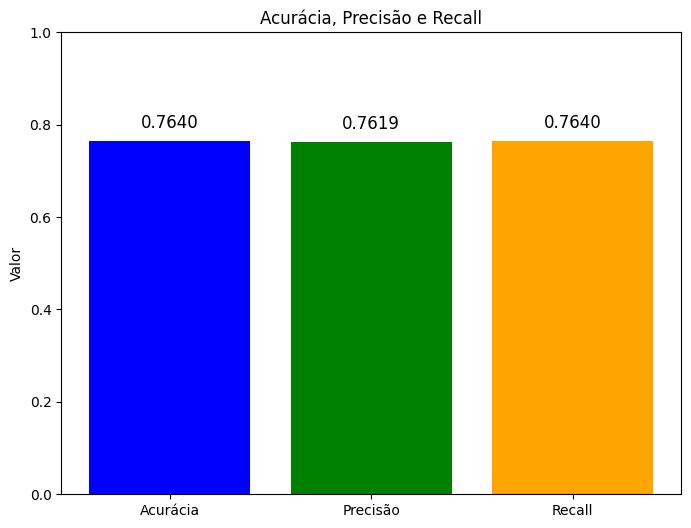

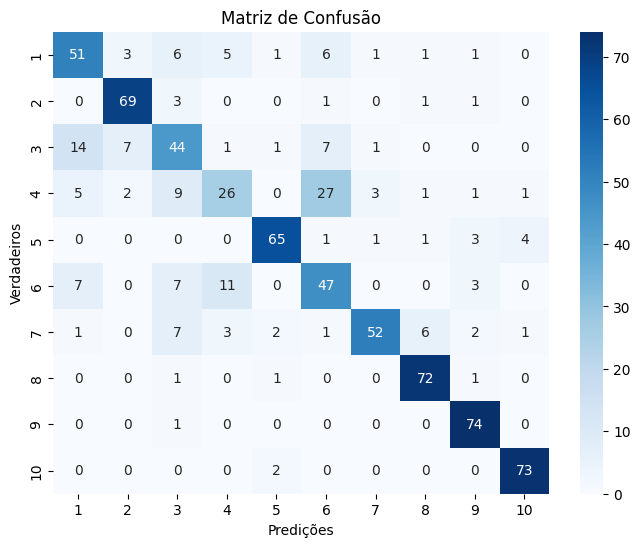

Acurácia: 0.7640
Precision: 0.7619
Recall: 0.7640
Confusion Matrix:
[[51  3  6  5  1  6  1  1  1  0]
 [ 0 69  3  0  0  1  0  1  1  0]
 [14  7 44  1  1  7  1  0  0  0]
 [ 5  2  9 26  0 27  3  1  1  1]
 [ 0  0  0  0 65  1  1  1  3  4]
 [ 7  0  7 11  0 47  0  0  3  0]
 [ 1  0  7  3  2  1 52  6  2  1]
 [ 0  0  1  0  1  0  0 72  1  0]
 [ 0  0  1  0  0  0  0  0 74  0]
 [ 0  0  0  0  2  0  0  0  0 73]]


In [7]:
%matplotlib inline
plotar_metricas(y_true, y_pred)